In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable

    You are using PySparkling of version 2.4.10, but your PySpark is of
    version 2.3.1. Please make sure Spark and PySparkling versions are compatible. 
`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly


In [4]:
op= Optimus(master="local[*]", app_name= "optimus", comm=True, verbose=True)

INFO:optimus:Operative System:Windows
INFO:optimus:Just check that Spark and all necessary environments vars are present...
INFO:optimus:-----
INFO:optimus:SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
INFO:optimus:HADOOP_HOME=C:\opt\hadoop-2.7.7
INFO:optimus:PYSPARK_PYTHON=C:\Users\argenisleon\Anaconda3\python.exe
INFO:optimus:PYSPARK_DRIVER_PYTHON=jupyter
INFO:optimus:PYSPARK_SUBMIT_ARGS=--jars "file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/RedshiftJDBC42-1.2.16.1027.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/mysql-connector-java-8.0.16.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/ojdbc8.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/postgresql-42.2.5.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/presto-jdbc-0.224.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/spark-cassandra-connector_2.11-2.4.1.jar,file:///C:/Users/argenisleon/Documents/Optimus/optimus/jars/sqlite-jdbc-3.27

In [5]:
from datetime import date, datetime
from pyspark.sql.types import *

df = op.create.df(
    [
        ("names", "str", True),
        ("height(ft)", "int", True),
        ("function", "str", True),
        ("rank", "int", True),
        ("age", "int", True),
        ("weight(t)", "float", True),
        ("japanese name", ArrayType(StringType()), True),
        ("last position seen", "str", True),
        ("date arrival", "str", True),
        ("last date seen", "str", True),
        ("attributes", ArrayType(FloatType()), True),
        ("DateType", DateType()),
        ("Timestamp", TimestampType()),
        ("Cybertronian", "bool", True),
        ("function(binary)", "binary", False),
        ("NullType", "null", True),

    ],
    [
        ("Optim'us", 28, "Leader", 10, 5000000, 4.30, ["Inochi", "Convoy"], "19.442735,-99.201111", "1980/04/10",
         "2016/09/10", [8.5344, 4300.0], date(2016, 9, 10), datetime(2014, 6, 24), True, bytearray("Leader", "utf-8"),
         None),
        ("bumbl#ebéé  ", 17, "Espionage", 7, 5000000, 2.0, ["Bumble", "Goldback"], "10.642707,-71.612534", "1980/04/10",
         "2015/08/10", [5.334, 2000.0], date(2015, 8, 10), datetime(2014, 6, 24), True, bytearray("Espionage", "utf-8"),
         None),
        ("ironhide&", 26, "Security", 7, 5000000, 4.0, ["Roadbuster"], "37.789563,-122.400356", "1980/04/10",
         "2014/07/10", [7.9248, 4000.0], date(2014, 6, 24), datetime(2014, 6, 24), True, bytearray("Security", "utf-8"),
         None),
        ("Jazz", 13, "First Lieutenant", 8, 5000000, 1.80, ["Meister"], "33.670666,-117.841553", "1980/04/10",
         "2013/06/10", [3.9624, 1800.0], date(2013, 6, 24), datetime(2014, 6, 24), True,
         bytearray("First Lieutenant", "utf-8"), None),
        ("Megatron", None, "None", 10, 5000000, 5.70, ["Megatron"], None, "1980/04/10", "2012/05/10", [None, 5700.0],
         date(2012, 5, 10), datetime(2014, 6, 24), True, bytearray("None", "utf-8"), None),
        ("", 300, "Battle Station", 8, 5000000, None, ["Metroflex"], None, "1980/04/10", "2011/04/10",
         [91.44, None], date(2011, 4, 10), datetime(2014, 6, 24), True, bytearray("Battle Station", "utf-8"), None),
        (None, 2, "3", 4, 5, 6.0, ["7"], 8, "1980/04/10", "2011/04/10",
         [11.0], date(2011, 4, 10), datetime(2014, 6, 24), True, bytearray("15", "utf-8"), None)
    ], infer_schema=True)

In [6]:
# df =df.repartition(1)

In [7]:
df = df.cols.fill_na("rank",0)
print(df.get_meta())

INFO:optimus:Using 'column_exp' to process column 'rank' with function func_col_exp


{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank']}}}


In [8]:
df = df.cols.rename("names","names1")
print(df.get_meta())

{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank'], 'rename': {'names': 'names1'}}}}


In [9]:
df = df.cols.rename("names1","names2")
print(df.get_meta())

{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank'], 'rename': {'names': 'names2'}}}}


In [10]:
df = df.cols.replace("names2","L","l")
print(df.get_meta())

INFO:optimus:Using 'pandas_udf' to process column 'names2' with function multiple_replace


{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank'], 'rename': {'names': 'names2'}, 'replace': ['names2']}}}


In [11]:
df = df.cols.rename("rank","rank1")
print(df.get_meta())

{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank'], 'rename': {'names': 'names2', 'rank': 'rank1'}, 'replace': ['names2']}}}


In [12]:
df = df.cols.keep(["names2","height(ft)","rank1","age","weight(t)"])
print(df.get_meta()) 

{'transformations': {'columns': ['names', 'height(ft)', 'function', 'rank', 'age', 'weight(t)', 'japanese name', 'last position seen', 'date arrival', 'last date seen', 'attributes', 'DateType', 'Timestamp', 'Cybertronian', 'function(binary)', 'NullType'], 'actions': {'fill_na': ['rank'], 'rename': {'names': 'names2', 'rank': 'rank1'}, 'replace': ['names2'], 'keep': ['names2', 'height(ft)', 'rank1', 'age', 'weight(t)']}}}


# First Profiler

In [13]:
from optimus.profiler.profiler import Profiler
p = Profiler()

INFO:optimus:Config.ini not found


COLUMNS: ['names2', 'height(ft)', 'rank1', 'age', 'weight(t)']


INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['names2', 'height(ft)', 'rank1', 'age', 'weight(t)']
INFO:optimus:Batch Histogram 0. Processing columns['names2', 'height(ft)', 'rank1', 'age', 'weight(t)']
INFO:optimus:Processing Frequency ...
INFO:optimus:`names2` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`names2` column(s) was not processed because is/are not array,vector,byte,date,binary
INFO:optimus:Outputting 0 columns after filtering. Is this expected?


Number of columns,5
Number of rows,7
Total Missing (%),3
Total size in memory,67.3 MB
Categorical,0
Numeric,0
Date,0
Array,0
Not available,0
Unique,5
Unique (%),71.43

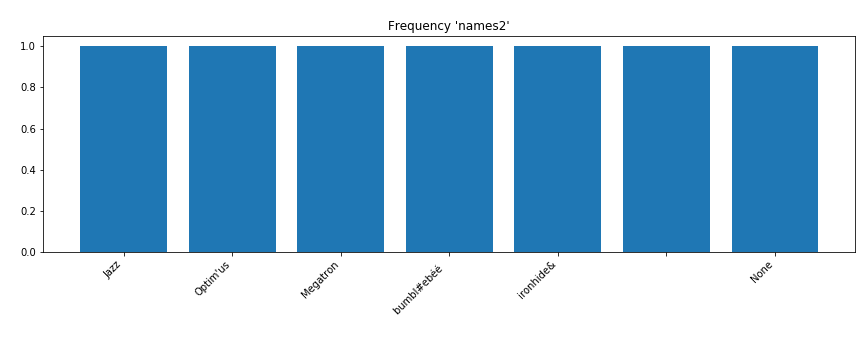
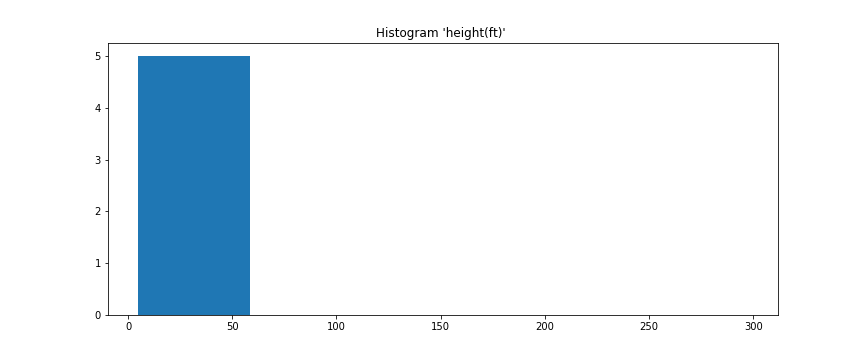
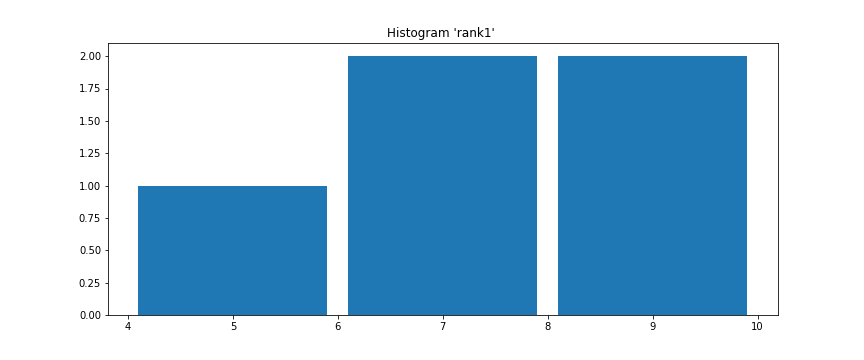
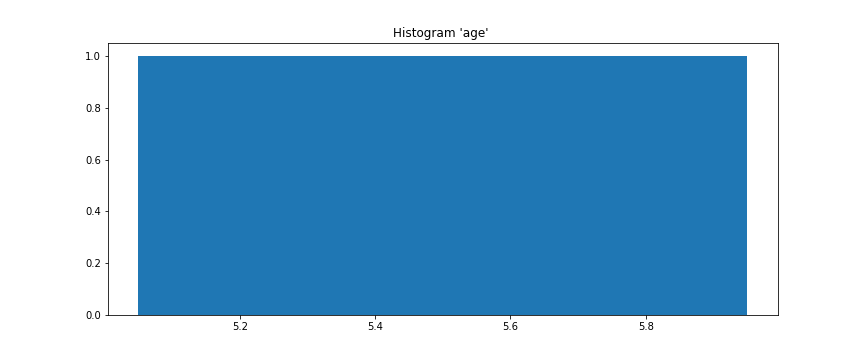
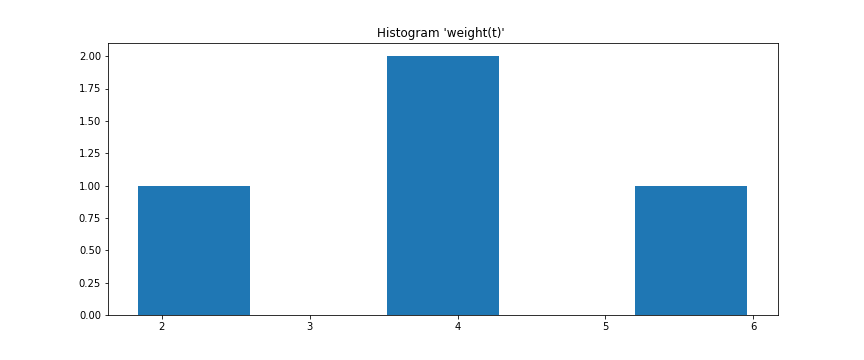

INFO:optimus:run() executed in 406.46 sec


In [14]:
p.run(df)

In [15]:
df = df.cols.drop("weight(t)")
print(df.get_meta())

{'transformations': {'columns': ['names2', 'height(ft)', 'rank1', 'age', 'weight(t)'], 'actions': {'drop': ['weight(t)']}}}


In [16]:
df = df.cols.lower("names2", output_cols= "new_names")
print(df.get_meta())

INFO:optimus:Using 'column_exp' to process column 'names2' with function _lower


{'transformations': {'columns': ['names2', 'height(ft)', 'rank1', 'age', 'weight(t)'], 'actions': {'drop': ['weight(t)']}}}


In [17]:
df = df.cols.rename("rank1","rank2")
print(df.get_meta())

{'transformations': {'columns': ['names2', 'height(ft)', 'rank1', 'age', 'weight(t)'], 'actions': {'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}}}


# Profiler 2

{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
{'drop': ['weight(t)'], 'rename': {'rank1': 'rank2'}}
modified []
new columns ['names2', 'height(ft)', 'rank2', 'age', 'new_names']
Processed columns ['names2', 'height(ft)', 'rank2', 'age', 'new_names']
COLUMNS: ['names2', 'height(ft)', 'rank2', 'age', 'new_names']


INFO:optimus:Processing Stats For columns...
INFO:optimus:Batch Stats 0. Processing columns['names2', 'height(ft)', 'rank2', 'age', 'new_names']
INFO:optimus:Batch Histogram 0. Processing columns['names2', 'height(ft)', 'rank2', 'age', 'new_names']
INFO:optimus:Processing Frequency ...
INFO:optimus:`names2`,`new_names` column(s) was not processed because is/are not byte,short,big,int,double,float
INFO:optimus:`names2`,`new_names` column(s) was not processed because is/are not array,vector,byte,date,binary
INFO:optimus:Outputting 0 columns after filtering. Is this expected?


Number of columns,5
Number of rows,7
Total Missing (%),3
Total size in memory,72.4 MB
Categorical,0
Numeric,0
Date,0
Array,0
Not available,0
Unique,5
Unique (%),71.43

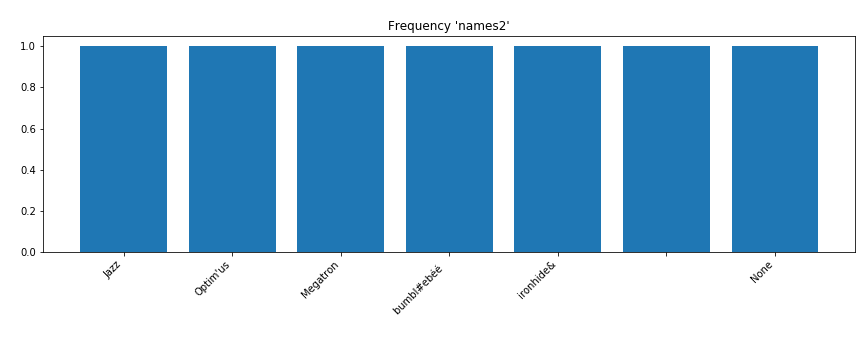
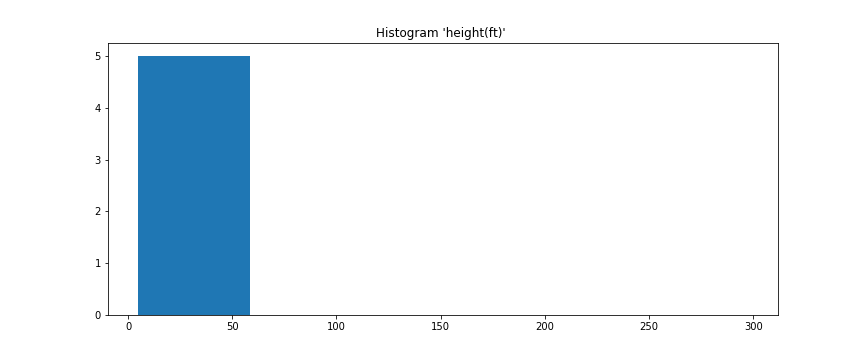
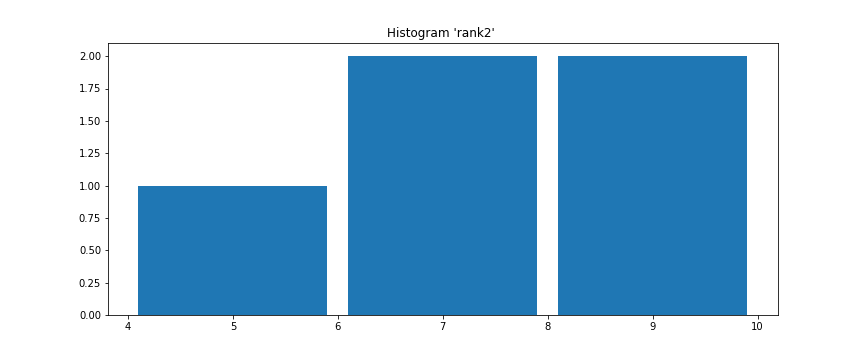
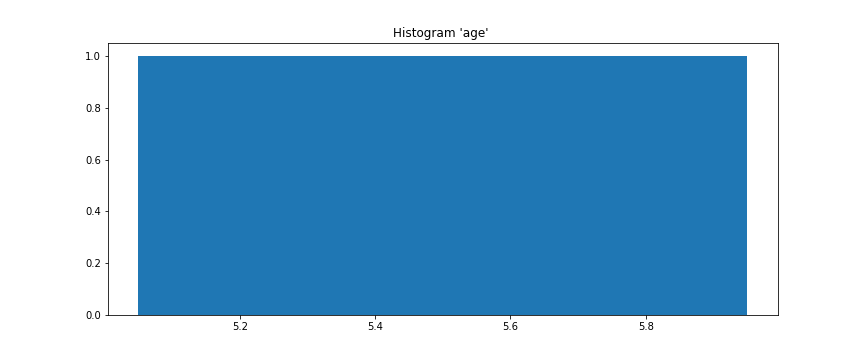
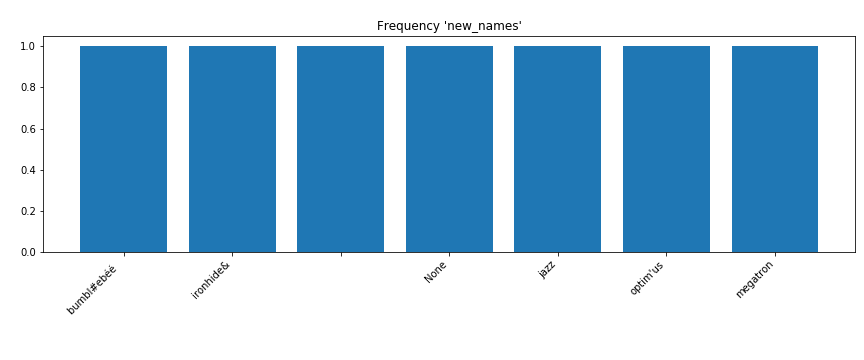

INFO:optimus:run() executed in 257.69 sec


In [18]:
p.run(df)

In [ ]:
list(p.output_columns["columns"].keys())

In [ ]:
len(df.get_meta()["transformations"].get("actions"))>0:


In [ ]:
df.show()

In [ ]:
df.cols.names()

In [ ]:
p.run(df)